# Experiments with Classifiers

## Reading in feature matrices

In [1]:
import pandas as pd
import numpy as np

# data path
data_path = '../data/'
data_path_metrics = '../data/metrics/'
data_path_temp = '../data/temp/'
data_path_prolog = '../data/prologData/'


In [ ]:
# read_feature_matrix(df_main, dflist) takes a dataframe df_main and a list of dataframes dflist. 
# It returns a feature matrix which merges the dataframes in dflist with df_main on the column "sent-id"
# If a colunm in a dataframe in dflist does exist in df_main, it is dropped.
def read_feature_matrix(df_main, dflist):
    if "num_statements" in df_main.columns:
        feature_matrix = df_main[["sent-id","num_statements"]]
    else:
        feature_matrix = df_main[["sent-id"]]   
    for df in dflist:
        # merge df with feature_matrix on "sent-id"
        # columns in df that are in feature_matrix are not merged
        columns = df.columns[df.columns.isin(feature_matrix.columns)]
        columns = columns[columns != "sent-id"]
        df = df.drop(columns=columns, axis=1)
        feature_matrix = feature_matrix.merge(df, on='sent-id', how="left")
    if "num_statements" in feature_matrix.columns:
        feature_matrix = feature_matrix[feature_matrix["num_statements"] > 0]
    feature_matrix = feature_matrix.drop_duplicates(subset=['sent-id'], keep='last')
    return feature_matrix

# drop_columns(df,col) takes a dataframe df and a list of columns col. It returns the dataframe df with the columns in col dropped.
def drop_columns(df,col):
    common_columns = df.columns.intersection(col)
    df = df.drop(columns = common_columns)
    return df

In [ ]:
# read all data
train = pd.read_csv(data_path + 'train.csv')
train_sentid = train["sent-id"]
trial = pd.read_csv(data_path + 'trial.csv')
trial_sentid = trial["sent-id"]
train = pd.concat([train,trial], join="inner")
train_amr = pd.read_csv(data_path_metrics + 'train_amr_feature_matrix.csv')
train_depTree = pd.read_csv(data_path_metrics + 'train_depTree_feature_matrix.csv')
train_additional = pd.read_csv(data_path_metrics + 'train_additional.csv')
# read train_rules (only columns sent-id and num_statements. Rename num_statements to rule_pred)
train_rules = pd.read_csv(data_path_metrics + 'parser_submission_train.csv', usecols=["sent-id", "num_statements"])
train_rules = train_rules.rename(columns={"num_statements": "rule_pred"})
trial_rules = pd.read_csv(data_path_metrics + 'parser_submission_trial.csv', usecols=["sent-id", "num_statements"])
trial_rules = trial_rules.rename(columns={"num_statements": "rule_pred"})
train_rules = pd.concat([train_rules,trial_rules], join="inner")
print(train.shape,train_amr.shape, train_depTree.shape, train_additional.shape, train_rules.shape) 

augmented = pd.read_csv(data_path + 'augmented.csv')
augmented_sentid = augmented["sent-id"]
augmented_amr = pd.read_csv(data_path_metrics + 'augmented_amr_feature_matrix.csv')
augmented_depTree = pd.read_csv(data_path_metrics + 'augmented_depTree_feature_matrix.csv')
augmented_additional = pd.read_csv(data_path_metrics + 'augmented_additional.csv')
augmented_rules = pd.read_csv(data_path_metrics + 'parser_submission_augmented.csv', usecols=["sent-id", "num_statements"])
augmented_rules = augmented_rules.rename(columns={"num_statements": "rule_pred"})
print(augmented.shape, augmented_amr.shape, augmented_depTree.shape, augmented_additional.shape, augmented_rules.shape)

test = pd.read_csv(data_path + 'test.csv')
test_sentid = test["sent-id"]
test_amr = pd.read_csv(data_path_metrics + 'test_amr_feature_matrix.csv')
test_depTree = pd.read_csv(data_path_metrics + 'test_depTree_feature_matrix.csv')
test_additional = pd.read_csv(data_path_metrics + 'test_additional.csv')
test_rules = pd.read_csv(data_path_metrics + 'parser_submission_test.csv', usecols=["sent-id", "num_statements"])
test_rules = test_rules.rename(columns={"num_statements": "rule_pred"})
print(test.shape, test_amr.shape, test_depTree.shape, test_additional.shape, test_rules.shape)

eval = pd.read_csv(data_path + 'eval.csv')
eval_sentid = eval["sent-id"]
eval_amr = pd.read_csv(data_path_metrics + 'eval_amr_feature_matrix.csv')
eval_depTree = pd.read_csv(data_path_metrics + 'eval_depTree_feature_matrix.csv')
eval_additional = pd.read_csv(data_path_metrics + 'eval_additional.csv')
eval_rules = pd.read_csv(data_path_metrics + 'parser_submission_eval.csv', usecols=["sent-id", "num_statements"])
eval_rules = eval_rules.rename(columns={"num_statements": "rule_pred"})
print(eval.shape, eval_amr.shape, eval_depTree.shape, eval_additional.shape, eval_rules.shape)



(2970, 10) (2520, 1778) (2520, 779) (2518, 51) (2970, 2)
(1207, 10) (1207, 1778) (1207, 779) (1207, 51) (1207, 2)
(416, 10) (416, 1778) (416, 779) (416, 51) (416, 2)
(878, 8) (878, 1778) (878, 779) (878, 49) (878, 2)


In [ ]:
col = ['genre', 'timestamp', 'user', 'statement_spans']
matrix_train = read_feature_matrix(train,[train_amr,train_depTree,train_additional,train_rules])
matrix_train = drop_columns(matrix_train,col)
matrix_augmented = read_feature_matrix(augmented,[augmented_amr,augmented_depTree,augmented_additional,augmented_rules])
matrix_augmented = drop_columns(matrix_augmented,col)
matrix_test = read_feature_matrix(test,[test_amr,test_depTree,test_additional,test_rules])
matrix_test = drop_columns(matrix_test,col)
matrix_eval = read_feature_matrix(eval,[eval_amr,eval_depTree,eval_additional,eval_rules])
matrix_eval = drop_columns(matrix_eval,col)
# if a column name starts with "Unnamed" drop it
matrix_train = matrix_train.loc[:,~matrix_train.columns.str.contains('^Unnamed')]
matrix_augmented = matrix_augmented.loc[:,~matrix_augmented.columns.str.contains('^Unnamed')]
matrix_test = matrix_test.loc[:,~matrix_test.columns.str.contains('^Unnamed')]
matrix_eval = matrix_eval.loc[:,~matrix_eval.columns.str.contains('^Unnamed')]
print(matrix_train.shape, matrix_augmented.shape, matrix_test.shape, matrix_eval.shape)


# all data in one matrix
matrix_all = pd.concat([matrix_train,matrix_augmented,matrix_test,matrix_eval])
# remove rows with double sent-id keep first
matrix_all = matrix_all.drop_duplicates(subset=['sent-id'], keep='first')
print(matrix_all.shape)


(2518, 2600) (1207, 2600) (416, 2600) (878, 2599)
(5017, 2600)


In [ ]:
# add bert features
bert_all = pd.read_csv(data_path_metrics + 'bert_all.csv')
matrix_all = matrix_all.merge(bert_all, on='sent-id')
# drop columns last_hidden_state 
matrix_all = matrix_all.drop(columns=["last_hidden_state"])
print(matrix_all.shape)

(5017, 2606)


In [ ]:
# add a column "type" to the matrix_all
matrix_all["type"] = "augmented"
matrix_all.loc[matrix_all["sent-id"].isin(train_sentid), "type"] = "train"
matrix_all.loc[matrix_all["sent-id"].isin(trial_sentid), "type"] = "trial"
matrix_all.loc[matrix_all["sent-id"].isin(test_sentid), "type"] = "test"
matrix_all.loc[matrix_all["sent-id"].isin(eval_sentid), "type"] = "eval"
print(matrix_all["type"].value_counts())


train        2493
augmented    1207
eval          878
test          416
trial          23
Name: type, dtype: int64


In [ ]:
columns_amr = train_amr.columns
columns_depTree = train_depTree.columns
columns_additional = train_additional.columns 
# add rule_pred to columns_additional
columns_bert = bert_all.columns
columns_bert = columns_bert.drop(["sent-id","last_hidden_state"])

def get_feature_type(feature):
    # get column_names of 
    if feature in columns_amr:
        return "amr"
    elif feature in ['amr_length']:
        return "amr"
    elif feature in columns_depTree:
        return "depTree"
    elif feature in ['max_dep_length', 'min_dep_length', 'mean_dep_length','num_root', 'num_root_childs',]:
        return "depTree"
    elif feature in columns_bert:
        return "bert"
        
    else:
        return "additional"
    


In [ ]:
feature_df = pd.DataFrame(columns = ["name", "ft_type"])
feature_df["name"] = matrix_all.columns.difference(['num_statements', 'topic', 'phrase', 'phrase_number',
       'phrase_tokenized', 'type', 'doc', 'pos_onehot', 'tree'])
feature_df["ft_type"] = feature_df["name"].apply(get_feature_type)

In [ ]:
feature_df[feature_df["ft_type"]=="additional"]["name"].values, len(feature_df[feature_df["ft_type"]=="additional"]["name"].values)


(array(['big_np_count', 'big_pp_count', 'class_score', 'conj_count',
        'disj_count', 'flesh_reading_ease', 'is_sent',
        'mean_chars_per_word', 'num_ADJP', 'num_ADVP', 'num_NP', 'num_PP',
        'num_S', 'num_VP', 'num_adjs', 'num_adps', 'num_advs', 'num_aux',
        'num_compound', 'num_conjs', 'num_det', 'num_nouns', 'num_num',
        'num_part', 'num_pron', 'num_punct', 'num_sym', 'num_verbs',
        'rule_pred', 'token_count', 'verb_count', 'wiener_sachtextformel'],
       dtype=object),
 32)

In [ ]:
matrix_all[t].head(3)

,amr_length,big_np_count,big_pp_count,class_score,conj_count,disj_count,flesh_reading_ease,is_sent,max_dep_length,mean_chars_per_word,...,num_pron,num_punct,num_root,num_root_childs,num_sym,num_verbs,rule_pred,token_count,verb_count,wiener_sachtextformel
0,1.0,1.0,0.0,1.00,0.0,0.0,80.28,1.0,4.0,5.666667,...,0.0,0.0,1.0,5.0,0.0,1.0,1,9.0,0.0,7.3
1,1.0,0.0,0.0,1.00,0.0,0.0,50.50,1.0,3.0,5.285714,...,0.0,0.0,1.0,5.0,0.0,1.0,1,5.0,1.0,16.0
2,1.0,0.0,0.0,0.93,0.0,0.0,96.18,1.0,6.0,5.818182,...,0.0,0.0,1.0,3.0,0.0,0.0,2,11.0,1.0,6.4


In [ ]:
# save the feature matrix to a csv file
matrix_all.to_csv(data_path_metrics + 'all_feature_matrix.csv',index=False)

In [ ]:
matrix_all.head(3)

,sent-id,num_statements,attr-(mod):,attr-(mod):attr-(mod):,attr-(mod):attr-(mod):attr-instance:,attr-(mod):attr-degree:,attr-(mod):attr-degree:attr-instance:,attr-(mod):attr-degree:attr-instance:very,attr-(mod):attr-instance:,attr-(mod):attr-instance:also,...,num_NP,num_PP,rule_pred,Umap_1,Umap_2,Umap_3,Umap_4,Umap_5,Umap_6,type
0,989,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1,11.690236,7.884734,10.057106,4.949733,15.330315,5.216332,train
1,990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,12.148330,7.456660,10.952022,4.254707,15.145471,5.301896,train
2,991,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,2,0.216440,7.571011,6.221335,11.813827,9.662160,8.349978,train


In [ ]:
def restrict_by_sentid(df, sentidlist):
    list = []
    # sentidlist is a series of sentid-lists
    # append them to one list and return
    for l in sentidlist:
        list.extend(l)

    return(df[df["sent-id"].isin(list)])


In [ ]:
# value counts of num_statements for train data

# from matrix_all only sentences with sent_id in concatenation of train_sentid and trial_sentid. Give value counts of num_statements
print("train + trial +  num_statements values\n", restrict_by_sentid(matrix_all,[train_sentid,trial_sentid])["num_statements"].value_counts())
print("train + trial + augmented num_statements values\n", restrict_by_sentid(matrix_all,[train_sentid,trial_sentid,augmented_sentid])["num_statements"].value_counts())
print("train + trial + augmented + test num_statements values\n", restrict_by_sentid(matrix_all,[train_sentid,trial_sentid,augmented_sentid,test_sentid])["num_statements"].value_counts())
print("train + trial + test num_statements values\n", restrict_by_sentid(matrix_all,[train_sentid,trial_sentid,test_sentid])["num_statements"].value_counts())


train + trial +  num_statements values
 1.0    1545
2.0     739
3.0     192
4.0      38
5.0       3
6.0       1
Name: num_statements, dtype: int64
train + trial + augmented num_statements values
 1.0    1545
2.0    1478
3.0     576
4.0     114
5.0       9
6.0       3
Name: num_statements, dtype: int64
train + trial + augmented + test num_statements values
 1.0    1803
2.0    1601
3.0     604
4.0     120
5.0      10
6.0       3
Name: num_statements, dtype: int64
train + trial + test num_statements values
 1.0    1803
2.0     862
3.0     220
4.0      44
5.0       4
6.0       1
Name: num_statements, dtype: int64


In [ ]:
import pandas as pd

# drop non-numerical columns
col = ['sentence','tree','topic','phrase','phrase_number','phrase_tokenized','pos_onehot','doc', 'label']


matrix_all = drop_columns(matrix_all,col)

print(matrix_all.shape)

# remove columns from matrix_train with too few !=0 entries in train data:
min_num_nonzero = 4
df = restrict_by_sentid(matrix_all,[train_sentid,trial_sentid])
minfreq_columns = df.loc[:, (df != 0).sum() >= min_num_nonzero].columns
matrix_all = matrix_all[minfreq_columns]
print(matrix_all.shape)

# print columns with NaN values
print(matrix_all.columns[matrix_all.isnull().any()].tolist())




(5017, 2598)
(5017, 1837)
['num_statements']


In [ ]:
X_all = matrix_all.drop(columns=["sent-id","num_statements"])
y_all = matrix_all["num_statements"]
print(X_all.shape, y_all.shape)





(5017, 1835) (5017,)


In [ ]:
X_train = restrict_by_sentid(matrix_all,[train_sentid,trial_sentid,augmented_sentid])
X_train_final = restrict_by_sentid(matrix_all,[train_sentid,trial_sentid,augmented_sentid,test_sentid])

y_train = X_train['num_statements']
y_train_final = X_train_final['num_statements']
z_train = X_train['sent-id']
X_train = X_train.drop(['sent-id','num_statements'], axis=1)
z_train_final = X_train_final['sent-id']
X_train_final = X_train_final.drop(['sent-id','num_statements'], axis=1)

X_test = restrict_by_sentid(matrix_all,[test_sentid])
y_test = X_test['num_statements']
z_test = X_test['sent-id']
X_test = X_test.drop(['sent-id','num_statements'], axis=1)
X_test_final = restrict_by_sentid(matrix_all,[eval_sentid]).drop(['num_statements'], axis=1)
z_test_final = X_test_final['sent-id']
X_test_final = X_test_final.drop(['sent-id'], axis=1)

# print columns with NaN values
print(X_train.columns[X_train.isnull().any()].tolist())

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_train_final.shape, y_train_final.shape, X_test_final.shape

[]


((3725, 1835),
 (3725,),
 (416, 1835),
 (416,),
 (4141, 1835),
 (4141,),
 (878, 1835))

In [ ]:
columns_amr = train_amr.columns
columns_depTree = train_depTree.columns
columns_additional = train_additional.columns 
# add rule_pred to columns_additional
columns_additional = columns_additional.append(pd.Index(["rule_pred"]))
columns_bert = bert_all.columns
columns_bert = columns_bert.drop(["sent-id","last_hidden_state"])
columns_bert




Index(['Umap_1', 'Umap_2', 'Umap_3', 'Umap_4', 'Umap_5', 'Umap_6'], dtype='object')

In [ ]:
columns_additional

Index(['sent-id', 'topic', 'phrase', 'phrase_number', 'genre', 'timestamp',
       'user', 'phrase_tokenized', 'num_statements', 'statement_spans',
       'verb_count', 'min_dep_length', 'disj_count', 'pos_onehot',
       'mean_dep_length', 'conj_count', 'max_dep_length', 'token_count',
       'class_score', 'flesh_reading_ease', 'is_sent', 'big_np_count',
       'big_pp_count', 'tree', 'Unnamed: 0', 'amr_length', 'doc',
       'wiener_sachtextformel', 'mean_chars_per_word', 'num_nouns',
       'num_verbs', 'num_adjs', 'num_advs', 'num_punct', 'num_adps',
       'num_conjs', 'num_det', 'num_pron', 'num_num', 'num_part', 'num_sym',
       'num_aux', 'num_root', 'num_compound', 'num_root_childs', 'num_S',
       'num_VP', 'num_NP', 'num_PP', 'num_ADJP', 'num_ADVP', 'rule_pred'],
      dtype='object')

In [ ]:
# for y_train and y_test proportion of labels round to 2 decimal places
print(y_train.value_counts(normalize=True).round(2))
print(y_test.value_counts(normalize=True).round(2))


1.0    0.41
2.0    0.40
3.0    0.15
4.0    0.03
5.0    0.00
6.0    0.00
Name: num_statements, dtype: float64
1.0    0.62
2.0    0.30
3.0    0.07
4.0    0.01
5.0    0.00
Name: num_statements, dtype: float64


In [ ]:
# minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# keep the column names
X_train_columns = X_train.columns
X_test_columns = X_test.columns

# fit and transform the train data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train_columns)
# transform the test data
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test_columns)
# transform the final train data
X_train_final = pd.DataFrame(scaler.transform(X_train_final), columns=X_train_columns)
# transform the final test data
X_test_final = pd.DataFrame(scaler.transform(X_test_final), columns=X_test_columns)



In [ ]:
X_test_final

,attr-(mod):,attr-(mod):attr-(mod):,attr-(mod):attr-(mod):attr-instance:,attr-(mod):attr-degree:,attr-(mod):attr-degree:attr-instance:,attr-(mod):attr-degree:attr-instance:very,attr-(mod):attr-instance:,attr-(mod):attr-instance:also,attr-(mod):attr-instance:another,attr-(mod):attr-instance:big,...,num_VP,num_NP,num_PP,rule_pred,Umap_1,Umap_2,Umap_3,Umap_4,Umap_5,Umap_6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.4,0.000000,0.000000,0.898516,0.719904,0.964665,0.091974,0.937734,0.189587
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.4,0.000000,0.166667,0.884710,0.765081,0.803285,0.113437,0.960812,0.125096
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.2,0.000000,0.000000,0.806650,0.735586,0.861222,0.161563,0.819125,0.187596
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.500000,0.166667,0.158300,0.776076,0.148794,0.950807,0.170767,0.702321
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.333333,0.028009,0.140820,0.493020,0.789368,0.059966,0.893895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.0,0.000000,0.166667,0.784851,0.747233,0.779934,0.168258,0.823853,0.157311
874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.2,0.000000,0.166667,0.974343,0.713015,0.778000,0.166136,0.927696,0.083628
875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.2,0.000000,0.166667,0.817084,0.679213,0.843726,0.106264,0.822067,0.124680
876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.4,0.000000,0.000000,0.892382,0.695239,0.954899,0.078313,0.899728,0.175910


In [ ]:
# y_train class 1 if 1 , class 2 if 2, 3 else
y_train_3 = y_train.apply(lambda x: 1 if x == 1 else (2 if x == 2 else 3))
y_test_3 = y_test.apply(lambda x: 1 if x == 1 else (2 if x == 2 else 3))
print(y_train_3.value_counts())
print(y_test_3.value_counts())



1    1545
2    1478
3     702
Name: num_statements, dtype: int64
1    258
2    123
3     35
Name: num_statements, dtype: int64


## Playing with classifiers

In [ ]:
# MLP
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes= (64,16), max_iter=300,random_state= 42)
clf.fit(X_train, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
# compute mae
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test, y_pred))



              precision    recall  f1-score   support

         1.0       0.97      0.93      0.95       258
         2.0       0.82      0.82      0.82       123
         3.0       0.57      0.86      0.69        28
         4.0       0.33      0.17      0.22         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.88       416
   macro avg       0.74      0.56      0.54       416
weighted avg       0.89      0.88      0.88       416

MAE: 0.13221153846153846


In [ ]:
# support vector machine
from sklearn.svm import SVC

clf = SVC()#class_weight="balanced")
clf.fit(X_train, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
print("MAE:",mean_absolute_error(y_test, y_pred))




              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       258
         2.0       0.97      0.93      0.95       123
         3.0       0.70      1.00      0.82        28
         4.0       1.00      0.00      0.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.95       416
   macro avg       0.93      0.58      0.55       416
weighted avg       0.96      0.95      0.94       416

MAE: 0.055288461538461536


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
print("MAE:",mean_absolute_error(y_test, y_pred))




              precision    recall  f1-score   support

         1.0       0.91      0.81      0.86       258
         2.0       0.59      0.60      0.59       123
         3.0       0.22      0.43      0.29        28
         4.0       0.33      0.33      0.33         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.72       416
   macro avg       0.61      0.44      0.42       416
weighted avg       0.76      0.72      0.73       416

MAE: 0.3293269230769231


In [ ]:
# dummy classifier
from sklearn.dummy import DummyClassifier

# Initialisiere den Dummy-Klassifikator
dummy_clf = DummyClassifier(strategy='most_frequent')

# Trainiere den Dummy-Klassifikator
dummy_clf.fit(X_train, y_train)

# Mache Vorhersagen
y_pred = dummy_clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
print("MAE:",mean_absolute_error(y_test, y_pred))






              precision    recall  f1-score   support

         1.0       0.62      1.00      0.77       258
         2.0       1.00      0.00      0.00       123
         3.0       1.00      0.00      0.00        28
         4.0       1.00      0.00      0.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.62       416
   macro avg       0.92      0.20      0.15       416
weighted avg       0.76      0.62      0.47       416

MAE: 0.4831730769230769


### random forest

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
# accuracy score
from sklearn.metrics import accuracy_score

def randForest(X_train, y_train, X_test, y_test):
    # Initialisiere den Random Forest Klassifikator
    rf_clf = RandomForestClassifier(random_state=42)#class_weight='balanced')

    # Trainiere den Random Forest Klassifikator
    rf_clf.fit(X_train, y_train)

    # Mache Vorhersagen
    y_pred = rf_clf.predict(X_test)

    # classification report
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred, zero_division=1))
    print("MAE:",mean_absolute_error(y_test, y_pred))

    y_pred_train = rf_clf.predict(X_train)
    #print accuracy rounded by 2 decimal places
    print("Train Accuracy: ", accuracy_score(y_train, y_pred_train).round(2))
    print("Train MAE: ", mean_absolute_error(y_train, y_pred_train))
    return rf_clf



#### All Classes

##### all features

In [ ]:
rf_clf = randForest(X_train, y_train, X_test, y_test)
importances = rf_clf.feature_importances_

importance_all = X_train.columns[np.argsort(importances)[::-1]]
print(importances[:3])
importance_all[:3]



              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98       258
         2.0       0.96      0.94      0.95       123
         3.0       0.76      1.00      0.86        28
         4.0       1.00      0.50      0.67         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.96       416
   macro avg       0.94      0.68      0.69       416
weighted avg       0.96      0.96      0.96       416

MAE: 0.04567307692307692
Train Accuracy:  1.0
Train MAE:  0.0
[0.00090673 0.00011899 0.00011205]


Index(['Umap_1', 'Umap_4', 'Umap_6'], dtype='object')

In [ ]:
import numpy as np
# show the feature importance of 25 most important features
indices = np.argsort(importances)[::-1]
for f in range(25):
    print(f"{f+1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")
    


1. feature Umap_1 (0.13721506519075527)
2. feature Umap_4 (0.10842518433153597)
3. feature Umap_6 (0.09980751590845978)
4. feature Umap_5 (0.09082054438553083)
5. feature Umap_3 (0.0822400648834682)
6. feature Umap_2 (0.07523476715384401)
7. feature token_count (0.020543576158451152)
8. feature max_dep_length (0.014818907701835539)
9. feature num_dep_paths (0.014164253735871456)
10. feature mean_dep_length (0.011053085356285703)
11. feature mean_chars_per_word (0.009717147552655007)
12. feature flesh_reading_ease (0.00803953255093411)
13. feature wiener_sachtextformel (0.007310311383742586)
14. feature num_compound (0.006769780931140673)
15. feature verb_count (0.006689862987815315)
16. feature num_S (0.00665514451085044)
17. feature num_PP (0.006478998951157383)
18. feature num_root_childs (0.005315484540941269)
19. feature num_nouns (0.004829507232618301)
20. feature rule_pred (0.004767503438457385)
21. feature num_NP (0.003742937350530128)
22. feature num_verbs (0.002841211734575403

##### only amr-features

In [ ]:
intersection = X_train.columns.intersection(columns_amr)
rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
importances = rf_clf.feature_importances_
importance_amr = X_train[intersection].columns[np.argsort(importances)[::-1]]

importance_amr[:3], X_train[intersection].shape

              precision    recall  f1-score   support

         1.0       0.74      0.70      0.72       258
         2.0       0.39      0.45      0.42       123
         3.0       0.15      0.14      0.15        28
         4.0       0.33      0.17      0.22         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.58       416
   macro avg       0.52      0.29      0.30       416
weighted avg       0.59      0.58      0.58       416

MAE: 0.49038461538461536
Train Accuracy:  0.97
Train MAE:  0.0348993288590604


(Index(['attr-arg0:attr-instance:', 'attr-arg2:attr-instance:', 'attr-arg2:'], dtype='object'),
 (3725, 1188))

##### only dependency tree

In [ ]:
intersection = X_train.columns.intersection(columns_depTree)
rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
importances = rf_clf.feature_importances_
importance_depTree = X_train[intersection].columns[np.argsort(importances)[::-1]]

importance_depTree[:3], X_train[intersection].shape

              precision    recall  f1-score   support

         1.0       0.83      0.72      0.77       258
         2.0       0.49      0.67      0.57       123
         3.0       0.22      0.18      0.20        28
         4.0       0.00      0.00      1.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.66       416
   macro avg       0.51      0.31      0.51       416
weighted avg       0.68      0.66      0.67       416

MAE: 0.3894230769230769
Train Accuracy:  0.96
Train MAE:  0.03973154362416107


(Index(['num_dep_paths', 'compound#PROPN', 'compound#compound#PROPN'], dtype='object'),
 (3725, 610))

##### only additional features

In [ ]:
intersection = X_train.columns.intersection(columns_additional)
rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
importances = rf_clf.feature_importances_
importance_additional = X_train[intersection].columns[np.argsort(importances)[::-1]]
importance_additional[:3], X_train[intersection].shape

              precision    recall  f1-score   support

         1.0       0.88      0.79      0.83       258
         2.0       0.54      0.67      0.60       123
         3.0       0.34      0.36      0.35        28
         4.0       0.00      0.00      1.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.71       416
   macro avg       0.55      0.36      0.56       416
weighted avg       0.73      0.71      0.73       416

MAE: 0.3125
Train Accuracy:  1.0
Train MAE:  0.0005369127516778523


(Index(['token_count', 'mean_chars_per_word', 'max_dep_length'], dtype='object'),
 (3725, 31))

#### all classes

In [ ]:
rf_clf = randForest(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98       258
         2.0       0.96      0.94      0.95       123
         3.0       0.76      1.00      0.86        28
         4.0       1.00      0.50      0.67         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.96       416
   macro avg       0.94      0.68      0.69       416
weighted avg       0.96      0.96      0.96       416

MAE: 0.04567307692307692
Train Accuracy:  1.0
Train MAE:  0.0


### Feature importance

In [ ]:
# take 40 of each importance list importances_amr, importance_depTree, importance_additional and append them to a general_importance list

n=35
general_importance = importance_amr[:n].append(importance_depTree[:n]).append(importance_additional[:n])


intersection = X_train.columns.intersection(general_importance)
rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
X_train[intersection].shape


              precision    recall  f1-score   support

         1.0       0.88      0.81      0.85       258
         2.0       0.58      0.72      0.64       123
         3.0       0.50      0.46      0.48        28
         4.0       1.00      0.00      0.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.75       416
   macro avg       0.79      0.40      0.39       416
weighted avg       0.77      0.75      0.75       416

MAE: 0.27403846153846156
Train Accuracy:  1.0
Train MAE:  0.0005369127516778523


(3725, 101)

In [ ]:
# take the overall 75 most important features
general_importance =  importance_all[:25]
print(len(general_importance ))

intersection = X_train.columns.intersection(general_importance)
rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
X_train[intersection].shape


25
              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98       258
         2.0       0.96      0.95      0.96       123
         3.0       0.82      1.00      0.90        28
         4.0       0.83      0.83      0.83         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.97       416
   macro avg       0.92      0.75      0.74       416
weighted avg       0.97      0.97      0.97       416

MAE: 0.036057692307692304
Train Accuracy:  1.0
Train MAE:  0.0


(3725, 25)

c:\Users\Wiebke Petersen\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


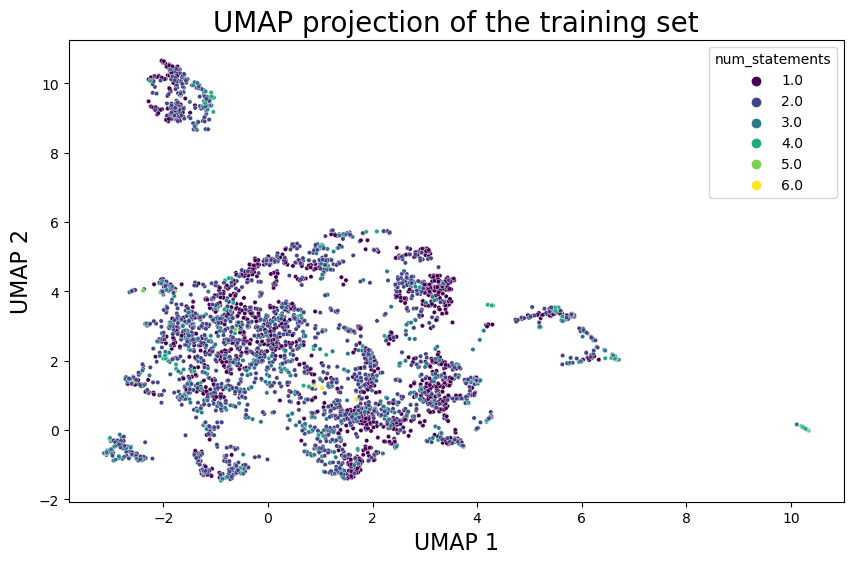

In [ ]:
# Umap for dimensionality reduction
from umap import UMAP

umap = UMAP(n_components=2, random_state=42)
X_train_umap = umap.fit_transform(X_train)

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# make the points smaller
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_umap[:, 0], y=X_train_umap[:, 1], hue=y_train, palette='viridis', s=10)
plt.title('UMAP projection of the training set', fontsize=20)
plt.xlabel('UMAP 1', fontsize=16)
plt.ylabel('UMAP 2', fontsize=16)
plt.show()


### Decision Tree

              precision    recall  f1-score   support

         1.0       1.00      0.93      0.96       258
         2.0       0.87      0.96      0.91       123
         3.0       0.82      1.00      0.90        28
         4.0       0.83      0.83      0.83         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.94       416
   macro avg       0.90      0.74      0.72       416
weighted avg       0.94      0.94      0.94       416

MAE: 0.06490384615384616


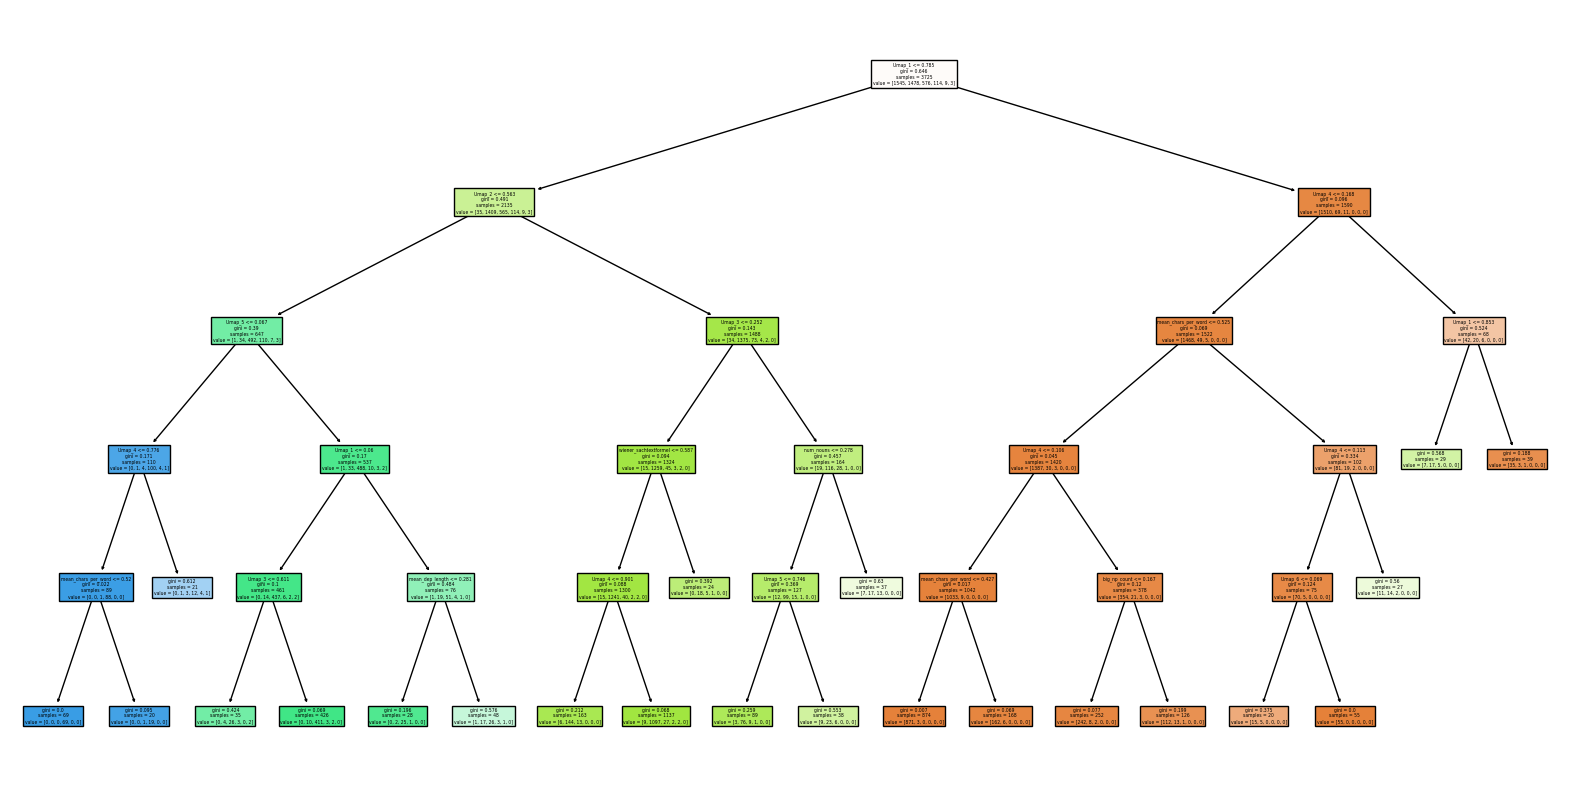

In [ ]:
general_importance =  importance_all[:25]
intersection = X_train.columns.intersection(general_importance)

X_train_10 = X_train[intersection] 
X_test_10 = X_test[intersection]

# decision tree
from sklearn.tree import DecisionTreeClassifier

# Initialisiere den Decision Tree Klassifikator
dt_clf = DecisionTreeClassifier(random_state= 42, criterion="gini", max_depth=5, min_samples_split=20, min_samples_leaf=20) 

# Trainiere den Decision Tree Klassifikator
dt_clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = dt_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
print("MAE:",mean_absolute_error(y_test, y_pred))

# print decision tree with column names

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

cols = [a for a in X_train_10.columns]

plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=cols, filled=True)
plt.show()


In [ ]:
from sklearn import tree
text_representation = tree.export_text(dt_clf, feature_names=cols)
print(text_representation)

|--- Umap_1 <= 0.79
|   |--- Umap_2 <= 0.56
|   |   |--- Umap_5 <= 0.07
|   |   |   |--- Umap_4 <= 0.78
|   |   |   |   |--- mean_chars_per_word <= 0.52
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- mean_chars_per_word >  0.52
|   |   |   |   |   |--- class: 4.0
|   |   |   |--- Umap_4 >  0.78
|   |   |   |   |--- class: 4.0
|   |   |--- Umap_5 >  0.07
|   |   |   |--- Umap_1 <= 0.06
|   |   |   |   |--- Umap_3 <= 0.61
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- Umap_3 >  0.61
|   |   |   |   |   |--- class: 3.0
|   |   |   |--- Umap_1 >  0.06
|   |   |   |   |--- mean_dep_length <= 0.28
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- mean_dep_length >  0.28
|   |   |   |   |   |--- class: 3.0
|   |--- Umap_2 >  0.56
|   |   |--- Umap_3 <= 0.25
|   |   |   |--- wiener_sachtextformel <= 0.59
|   |   |   |   |--- Umap_4 <= 0.90
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- Umap_4 >  0.90
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- wien

##### only two classes (1 statement versus >1 statement)

In [ ]:
y_train_simple = y_train.apply(lambda x: 1 if x == 1 else 2)
y_test_simple = y_test.apply(lambda x: 1 if x == 1 else 2)

In [ ]:
# decision tree with simple labels
# Initialisiere den Decision Tree Klassifikator
dt_clf = DecisionTreeClassifier(random_state= 42, criterion="gini", max_depth=2, min_samples_split=3, min_samples_leaf=7)#, class_weight="balanced")

# Trainiere den Decision Tree Klassifikator
dt_clf.fit(X_train, y_train_simple)

# Mache Vorhersagen
y_pred = dt_clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.99      0.97      0.98       258
           2       0.95      0.99      0.97       158

    accuracy                           0.98       416
   macro avg       0.97      0.98      0.97       416
weighted avg       0.98      0.98      0.98       416



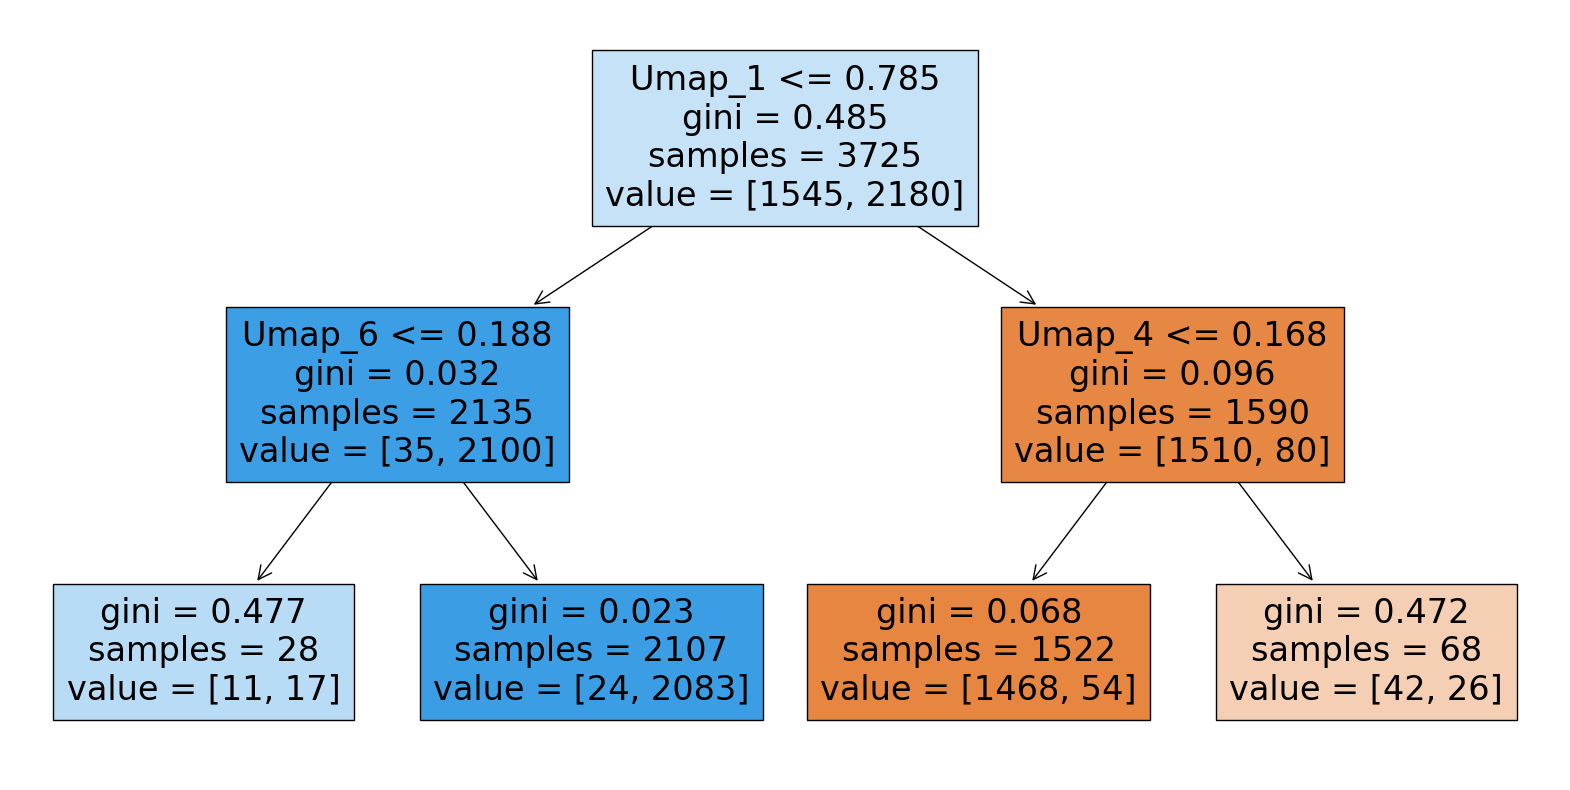

In [ ]:
# print decision tree with column names

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

cols = [a for a in X_train.columns]

plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=cols, filled=True)
plt.show()

In [ ]:
from sklearn import tree
text_representation = tree.export_text(dt_clf, feature_names=cols)
print(text_representation)

|--- Umap_1 <= 0.79
|   |--- Umap_6 <= 0.19
|   |   |--- class: 2
|   |--- Umap_6 >  0.19
|   |   |--- class: 2
|--- Umap_1 >  0.79
|   |--- Umap_4 <= 0.17
|   |   |--- class: 1
|   |--- Umap_4 >  0.17
|   |   |--- class: 1



In [ ]:
# decision tree with simple labels
# Initialisiere den Decision Tree Klassifikator
dt_clf = DecisionTreeClassifier(random_state= 42, criterion="gini", max_depth=1, min_samples_split=3, min_samples_leaf=7)#, class_weight="balanced")

X_train_10 = X_train
X_test_10 = X_test

# Trainiere den Decision Tree Klassifikator
dt_clf.fit(X_train_10, y_train_simple)

# Mache Vorhersagen
y_pred = dt_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.99      0.97      0.98       258
           2       0.95      0.99      0.97       158

    accuracy                           0.98       416
   macro avg       0.97      0.98      0.97       416
weighted avg       0.98      0.98      0.98       416



In [ ]:
from sklearn import tree
text_representation = tree.export_text(dt_clf, feature_names=cols)
print(text_representation)

|--- Umap_1 <= 0.79
|   |--- class: 2
|--- Umap_1 >  0.79
|   |--- class: 1



# winning model

random forest with 25 most important features from each feature group

##### only amr-features

In [ ]:
intersection = X_train.columns.intersection(columns_amr)
rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
importances = rf_clf.feature_importances_
importance_amr = X_train[intersection].columns[np.argsort(importances)[::-1]]

importance_amr[:3], X_train[intersection].shape

              precision    recall  f1-score   support

         1.0       0.74      0.70      0.72       258
         2.0       0.39      0.45      0.42       123
         3.0       0.15      0.14      0.15        28
         4.0       0.33      0.17      0.22         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.58       416
   macro avg       0.52      0.29      0.30       416
weighted avg       0.59      0.58      0.58       416

MAE: 0.49038461538461536
Train Accuracy:  0.97
Train MAE:  0.0348993288590604


(Index(['attr-arg0:attr-instance:', 'attr-arg2:attr-instance:', 'attr-arg2:'], dtype='object'),
 (3725, 1188))

##### only dependency tree

In [ ]:
intersection = X_train.columns.intersection(columns_depTree)
rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
importances = rf_clf.feature_importances_
importance_depTree = X_train[intersection].columns[np.argsort(importances)[::-1]]

importance_depTree[:3], X_train[intersection].shape

              precision    recall  f1-score   support

         1.0       0.83      0.72      0.77       258
         2.0       0.49      0.67      0.57       123
         3.0       0.22      0.18      0.20        28
         4.0       0.00      0.00      1.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.66       416
   macro avg       0.51      0.31      0.51       416
weighted avg       0.68      0.66      0.67       416

MAE: 0.3894230769230769
Train Accuracy:  0.96
Train MAE:  0.03973154362416107


(Index(['num_dep_paths', 'compound#PROPN', 'compound#compound#PROPN'], dtype='object'),
 (3725, 610))

##### only additional features

In [ ]:
intersection = X_train.columns.intersection(columns_additional)
rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
importances = rf_clf.feature_importances_
importance_additional = X_train[intersection].columns[np.argsort(importances)[::-1]]
importance_additional[:3], X_train[intersection].shape

              precision    recall  f1-score   support

         1.0       0.88      0.79      0.83       258
         2.0       0.54      0.67      0.60       123
         3.0       0.34      0.36      0.35        28
         4.0       0.00      0.00      1.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.71       416
   macro avg       0.55      0.36      0.56       416
weighted avg       0.73      0.71      0.73       416

MAE: 0.3125
Train Accuracy:  1.0
Train MAE:  0.0005369127516778523


(Index(['token_count', 'mean_chars_per_word', 'max_dep_length'], dtype='object'),
 (3725, 31))

In [ ]:
# take 25 of each importance list importances_amr, importance_depTree, importance_additional and append them to a general_importance list

#general_importance = []
#for i in range(50):
#    general_importance.append(importance_amr[i])
#    general_importance.append(importance_depTree[i])
#    general_importance.append(importance_additional[i])

for n in [10,20,25,30,35,40,45,50]:
    general_importance = importance_amr[:n].append(importance_depTree[:n]).append(importance_additional[:n])

    intersection = X_train.columns.intersection(general_importance)
    print(n)
    rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
    print(X_train[intersection].shape)


n=40   
general_importance = importance_amr[:n].append(importance_depTree[:n]).append(importance_additional[:n])
# add bert features
general_importance = general_importance.append(columns_bert)

intersection = X_train.columns.intersection(general_importance)
rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
print(X_train[intersection].shape)

    

10
              precision    recall  f1-score   support

         1.0       0.85      0.77      0.81       258
         2.0       0.52      0.64      0.58       123
         3.0       0.41      0.46      0.43        28
         4.0       1.00      0.00      0.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.70       416
   macro avg       0.76      0.38      0.36       416
weighted avg       0.73      0.70      0.70       416

MAE: 0.3317307692307692
Train Accuracy:  1.0
Train MAE:  0.0008053691275167785
(3725, 30)
20
              precision    recall  f1-score   support

         1.0       0.86      0.82      0.84       258
         2.0       0.56      0.67      0.61       123
         3.0       0.54      0.46      0.50        28
         4.0       1.00      0.00      0.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.74       416
   macro avg       0.79      0.39  

Fit on all data (including test) and predict on eval

In [ ]:
X_test_final[intersection].columns.intersection(columns_bert)

Index(['Umap_1', 'Umap_2', 'Umap_3', 'Umap_4', 'Umap_5', 'Umap_6'], dtype='object')

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_final[intersection], y_train_final)

# Mache Vorhersagen
y_pred_final = rf_clf.predict(X_test_final[intersection])


X_train_final.shape, X_test_final.shape

((4141, 1835), (878, 1835))

In [ ]:
train[train["num_statements"]>0].shape, test[test["num_statements"]>0].shape, eval.shape, trial[trial["num_statements"]>0].shape

((2520, 10), (416, 10), (878, 8), (25, 11))

In [ ]:
# prediction is a dataframe with the columns "sent-id" and "num_statements" (both as integers) and and empty "statement_sp columnans"
prediction = pd.DataFrame(columns = ["sent-id", "num_statements", "statement_spans"])
prediction["sent-id"] = z_test_final.astype(int)
prediction["num_statements"] = y_pred_final.astype(int)
prediction["statement_spans"] = ""
# prediction to csv file as zip file named "prediction.zip"
prediction.to_csv(data_path + "prediction.csv",index=False)
# zip the file
import zipfile
with zipfile.ZipFile(data_path + 'prediction.zip','w') as zip:
    zip.write(data_path + 'prediction.csv', 'prediction.csv')
print(prediction.shape)

prediction.head(10)

(878, 3)


,sent-id,num_statements,statement_spans
2513,41023,1,
2516,40092,1,
4141,39703,1,
4142,39704,2,
4143,39705,4,
4144,39706,1,
4145,39708,1,
4146,39710,1,
4147,39711,2,
4148,39714,1,


### unorganized rest

In [ ]:
# all data

# logistic regression 
from sklearn.linear_model import LogisticRegression

# Initialisiere den Klassifikator
clf = LogisticRegression(max_iter=1000)
# fit to X_train
clf.fit(X_train, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
print("MAE:",mean_absolute_error(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.80      0.89      0.84       258
         2.0       0.59      0.54      0.56       123
         3.0       0.35      0.25      0.29        28
         4.0       1.00      0.00      0.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.73       416
   macro avg       0.75      0.33      0.34       416
weighted avg       0.71      0.73      0.71       416

MAE: 0.3125


In [ ]:
general_importance =  importance_amr[:75]
intersection = X_train.columns.intersection(general_importance)

# X_train_10
X_train_10 = X_train[intersection]
X_test_10 = X_test[intersection]

# Initialisiere den Klassifikator
clf = LogisticRegression(max_iter=1000)
# fit to X_train_10
clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
print("MAE:",mean_absolute_error(y_test, y_pred))




              precision    recall  f1-score   support

         1.0       0.68      0.92      0.78       258
         2.0       0.47      0.24      0.32       123
         3.0       0.50      0.04      0.07        28
         4.0       1.00      0.00      0.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.64       416
   macro avg       0.73      0.24      0.23       416
weighted avg       0.61      0.64      0.58       416

MAE: 0.4254807692307692


In [ ]:
# random forest x_train_10
from sklearn.ensemble import RandomForestClassifier

# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
print("MAE:",mean_absolute_error(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.70      0.78      0.73       258
         2.0       0.39      0.34      0.36       123
         3.0       0.25      0.18      0.21        28
         4.0       0.00      0.00      1.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.59       416
   macro avg       0.47      0.26      0.46       416
weighted avg       0.57      0.59      0.59       416

MAE: 0.4807692307692308


In [ ]:
# random forest simple labels and X_train_10
# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
print("MAE:",mean_absolute_error(y_test, y_pred))



              precision    recall  f1-score   support

         1.0       0.69      0.78      0.73       258
         2.0       0.40      0.35      0.37       123
         3.0       0.21      0.14      0.17        28
         4.0       0.00      0.00      1.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.59       416
   macro avg       0.46      0.25      0.46       416
weighted avg       0.56      0.59      0.59       416

MAE: 0.4879807692307692


In [ ]:
few_tokens = 0.16

y_train_few_tokens = y_train[X_train["token_count"] <= few_tokens]
y_test_few_tokens = y_test[X_test["token_count"] <= few_tokens]
y_train_many_tokens = y_train[X_train["token_count"] > few_tokens]
y_test_many_tokens = y_test[X_test["token_count"] > few_tokens]




from sklearn.metrics import accuracy_score
y_pred1 = [1] * len(y_test_few_tokens)
y_pred2 = [2] * len(y_test_many_tokens)
print(accuracy_score(y_pred1 + y_pred2, list(y_test_few_tokens) + list(y_test_many_tokens)))

y_pred1 = [1] * len(y_train_few_tokens)
y_pred2 = [2] * len(y_train_many_tokens)
print(accuracy_score(y_pred1 + y_pred2, list(y_train_few_tokens) + list(y_train_many_tokens)))

y_pred1 = [1] * len(y_test_few_tokens)
y_pred2 = [2] * len(y_test_many_tokens)
# y_test1 is 1 if y_test_few_tokens is 1, else 2
y_test1 = y_test_few_tokens.apply(lambda x: 1 if x == 1 else 2)
y_test2 = y_test_many_tokens.apply(lambda x: 1 if x == 1 else 2)
print(accuracy_score(y_pred1 + y_pred2, list(y_test1) + list(y_test2)))

y_pred1 = [1] * len(y_train_few_tokens)
y_pred2 = [2] * len(y_train_many_tokens)
# y_train1 is 1 if y_train_few_tokens is 1, else 2
y_train1 = y_train_few_tokens.apply(lambda x: 1 if x == 1 else 2)
y_train2 = y_train_many_tokens.apply(lambda x: 1 if x == 1 else 2)
print(accuracy_score(y_pred1 + y_pred2, list(y_train1) + list(y_train2)))



0.7163461538461539
0.3881879194630872
0.8004807692307693
0.47436241610738256


In [ ]:
#support vector machine
from sklearn.svm import SVC

clf = SVC()#class_weight="balanced")
clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))
print("MAE:",mean_absolute_error(y_test, y_pred))


NameError: name 'y_test_simple' is not defined

In [ ]:
# mlp
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state= 42)
clf.fit(X_train, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))
print("MAE:",mean_absolute_error(y_test, y_pred))



              precision    recall  f1-score   support

         1.0       0.79      0.81      0.80       258
         2.0       0.46      0.46      0.46       123
         3.0       0.24      0.21      0.23        28
         4.0       0.00      0.00      1.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.66       416
   macro avg       0.50      0.30      0.50       416
weighted avg       0.65      0.66      0.66       416

MAE: 0.3870192307692308


In [ ]:
import textstat
textstat.set_lang("de")

test_data = (
    "Wiener Schnitzel ist ein dünnes paniertes und in Fett ausgebackenes Schnitzel aus Kalbfleisch. Es gehört zu den bekanntesten Spezialitäten der Wiener Küche. Auch Schnitzel aus anderen Fleischsorten werden umgangssprachlich so bezeichnet, wenn sie in Panierung zubereitet werden. Allerdings müssen in Österreich und Deutschland diese in der Gastronomie und im Lebensmittelhandel etwa als Wiener Schnitzel vom Schwein oder Schnitzel Wiener Art bezeichnet werden."
)

textstat.wiener_sachtextformel(test_data, 1)

10.1

In [ ]:
# take 25 of each importance list importances_amr, importance_depTree, importance_additional and append them to a general_importance list

general_importance = []
for i in range(25):
    general_importance.append(importance_amr[i])
    general_importance.append(importance_depTree[i])
    general_importance.append(importance_additional[i])


intersection = X_train.columns.intersection(general_importance)
rf_clf = randForest(X_train[intersection], y_train, X_test[intersection], y_test)
X_train[intersection].shape


              precision    recall  f1-score   support

         1.0       0.81      0.92      0.86       258
         2.0       0.61      0.53      0.57       123
         3.0       0.67      0.36      0.47        28
         4.0       1.00      0.00      0.00         6
         5.0       1.00      0.00      0.00         1

    accuracy                           0.75       416
   macro avg       0.82      0.36      0.38       416
weighted avg       0.74      0.75      0.73       416

MAE: 0.2644230769230769
Train Accuracy:  1.0
Train MAE:  0.0007942811755361397


(2518, 75)

Todo
- amr: length of list feature
- depTree: number root feature
- augmented basic and tree features
- combine train + test+ augmented for training
- BERT classifier

